In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
from sklearn.preprocessing import MultiLabelBinarizer
from pandas.plotting import parallel_coordinates

In [9]:
data=pd.read_csv('recipes.csv')
data.head()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,1533,Dancer,PT24H,PT45M,PT24H45M,1999-08-09T21:46:00Z,Make and share this Low-Fat Berry Blue Frozen ...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,1.3,8.0,29.8,37.1,3.6,30.2,3.2,4.0,NaN,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,1567,elly9812,PT25M,PT4H,PT4H25M,1999-08-29T13:12:00Z,Make and share this Biryani recipe from Food.com.,"c(""https://img.sndimg.com/food/image/upload/w_...",...,16.6,372.8,368.4,84.4,9.0,20.4,63.4,6.0,NaN,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,1566,Stephen Little,PT5M,PT30M,PT35M,1999-09-05T19:52:00Z,This is from one of my first Good House Keepi...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,0.0,0.0,1.8,81.5,0.4,77.2,0.3,4.0,NaN,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,1586,Cyclopz,PT20M,PT24H,PT24H20M,1999-09-03T14:54:00Z,This dish is best prepared a day in advance to...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,2.0,4 kebabs,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,1538,Duckie067,PT30M,PT20M,PT50M,1999-09-19T06:19:00Z,Make and share this Cabbage Soup recipe from F...,"""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,0.0,959.3,25.1,4.8,17.7,4.3,4.0,NaN,"c(""Mix everything together and bring to a boil..."


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 28 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [13]:
data.shape

(522517, 28)

In [15]:
data.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000


In [17]:
data.tail()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions
522512,541379,Meg's Fresh Ginger Gingerbread,2002090414,rdsxc,PT35M,PT1H,PT1H35M,2020-12-22T15:27:00Z,Make and share this Meg's Fresh Ginger Gingerb...,character(0),...,7.6,54.4,278.2,48.5,0.8,22.8,3.9,8.0,1 8x8 cake pan,"c(""Preheat oven to 350&deg;F Grease an 8x8 cak..."
522513,541380,Roast Prime Rib au Poivre with Mixed Peppercorns,211566,Denver cooks,PT3H,PT30M,PT3H30M,2020-12-22T15:32:00Z,"White, black, green, and pink peppercorns add ...","""https://img.sndimg.com/food/image/upload/w_55...",...,71.4,433.8,766.3,3.2,0.7,0.1,117.0,8.0,1 Roast,"c(""Position rack in center of oven and preheat..."
522514,541381,Kirshwasser Ice Cream,2001131545,Jonathan F.,PT3H,PT1H,PT4H,2020-12-22T15:33:00Z,Make and share this Kirshwasser Ice Cream reci...,character(0),...,72.6,470.9,192.5,33.9,0.0,17.3,12.8,6.0,NaN,"c(""heat half and half and heavy cream to a sim..."
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,2001004241,CLUBFOODY,NaN,PT15M,PT15M,2020-12-22T22:11:00Z,"Extremely quick and easy to make, these are gr...","""https://img.sndimg.com/food/image/upload/w_55...",...,0.1,2.9,100.5,0.3,0.0,0.1,2.4,NaN,20 rolls,"c(""In a small bowl, combine mayo and wasabi pa..."
522516,541383,Spicy Baked Scotch Eggs,188099,Chef LauraMD,PT25M,PT15M,PT40M,2020-12-22T22:12:00Z,"Great way to have hard boiled eggs and crispy,...",character(0),...,22.2,1769.7,1318.6,29.7,1.3,6.7,76.4,NaN,NaN,"c(""Mix sausage, panko, egg yolk and Wocestersh..."


In [19]:
data.nunique()

RecipeId                      522517
Name                          438188
AuthorId                       57178
AuthorName                     56793
CookTime                         490
PrepTime                         318
TotalTime                       1240
DatePublished                 245540
Description                   492838
Images                        165889
RecipeCategory                   311
Keywords                      216569
RecipeIngredientQuantities    459571
RecipeIngredientParts         497120
AggregatedRating                   9
ReviewCount                      420
Calories                       30138
FatContent                      4523
SaturatedFatContent             2533
CholesterolContent              9803
SodiumContent                  40455
CarbohydrateContent             8102
FiberContent                    1067
SugarContent                    6008
ProteinContent                  2581
RecipeServings                   171
RecipeYield                    34043
R

In [21]:
data.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [23]:
(data.isnull().sum()/(len(data)))*100

RecipeId                       0.000000
Name                           0.000000
AuthorId                       0.000000
AuthorName                     0.000000
CookTime                      15.797572
PrepTime                       0.000000
TotalTime                      0.000000
DatePublished                  0.000000
Description                    0.000957
Images                         0.000191
RecipeCategory                 0.143727
Keywords                       3.298840
RecipeIngredientQuantities     0.000574
RecipeIngredientParts          0.000000
AggregatedRating              48.462155
ReviewCount                   47.364775
Calories                       0.000000
FatContent                     0.000000
SaturatedFatContent            0.000000
CholesterolContent             0.000000
SodiumContent                  0.000000
CarbohydrateContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
ProteinContent                 0.000000


In [25]:
data.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

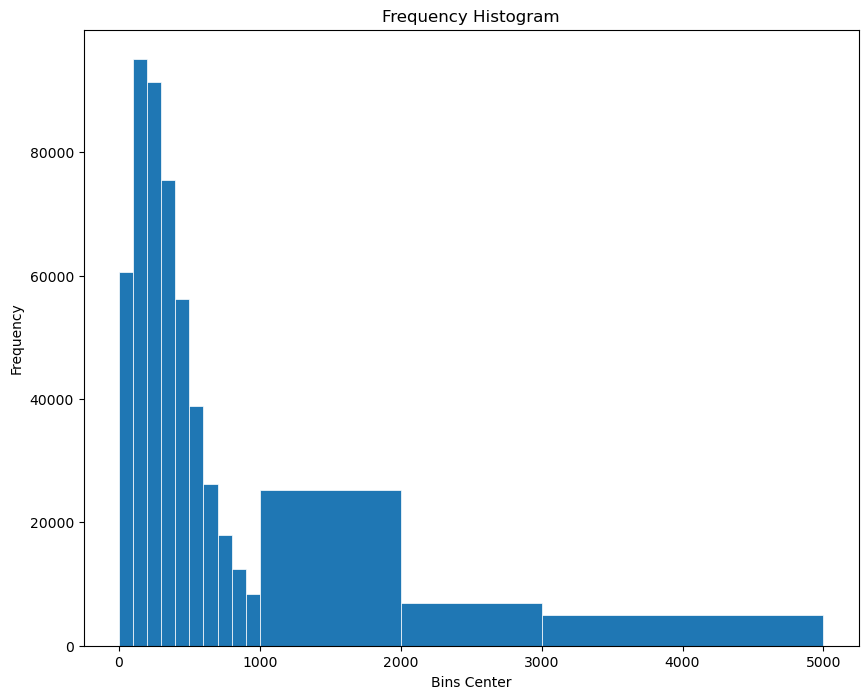

In [27]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.title('Frequency Histogram')
plt.ylabel('Frequency')
plt.xlabel('Bins Center')
ax.hist(data.Calories.to_numpy(),bins=[0,100,200,300,400,500,600,700,800,900,1000,1000,2000,3000,5000],linewidth=0.5, edgecolor="white")
plt.show()

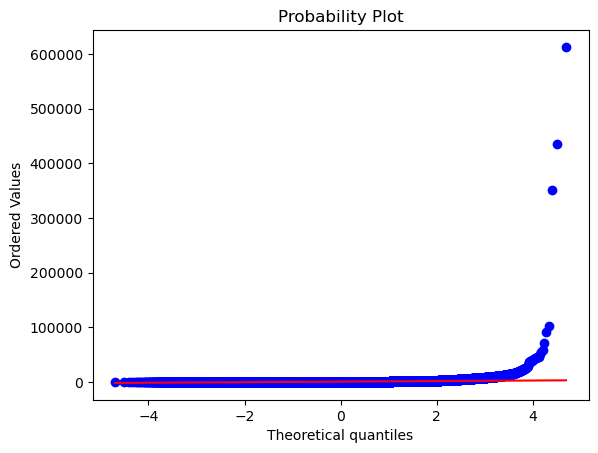

In [29]:
import pylab
import scipy.stats as stats
stats.probplot(data.Calories.to_numpy(), dist="norm", plot=pylab)
pylab.show()

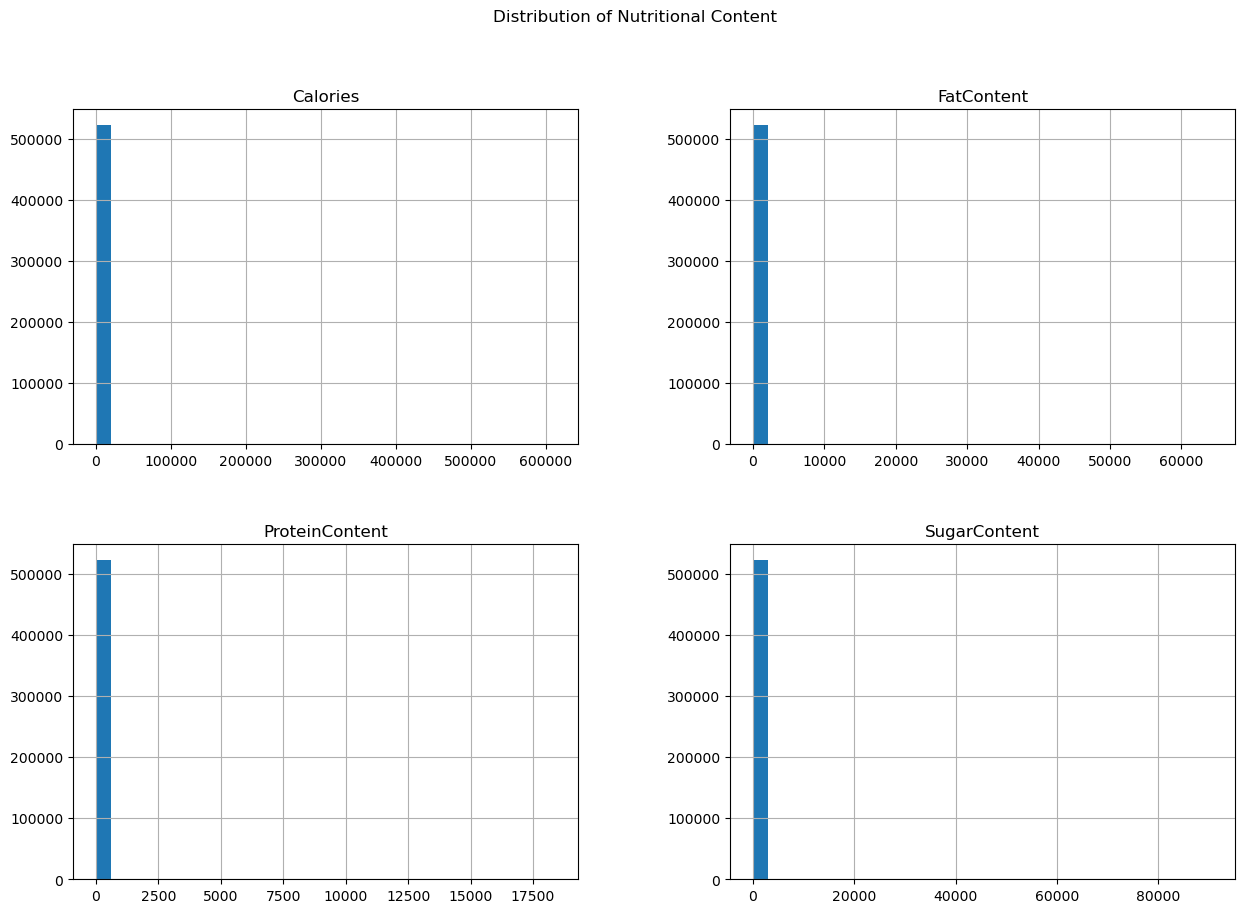

In [31]:
# 1. Distribution of Nutritional Content
nutritional_columns = ['Calories', 'FatContent', 'ProteinContent', 'SugarContent']
data[nutritional_columns].hist(bins=30, figsize=(15, 10))
plt.suptitle('Distribution of Nutritional Content')
plt.show()

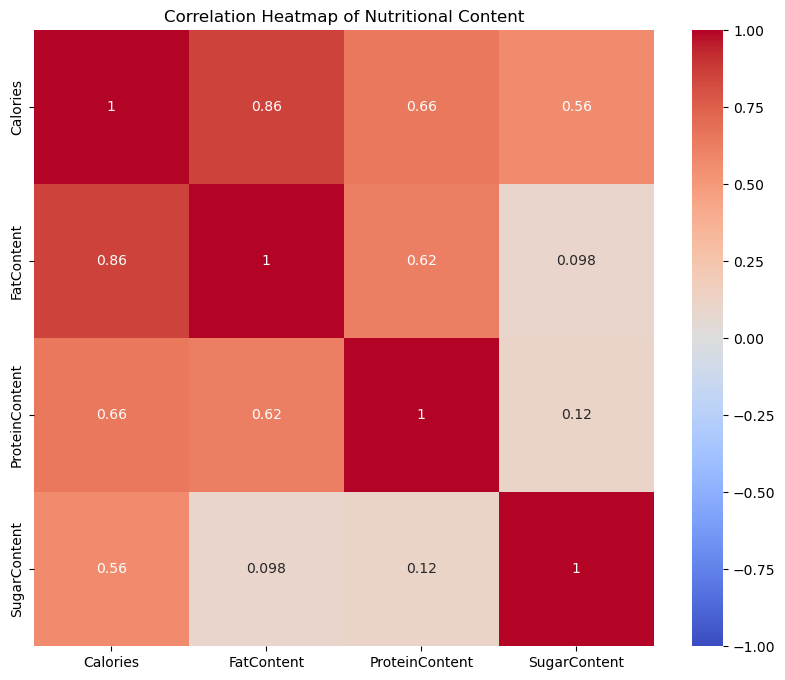

In [33]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
corr = data[nutritional_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Nutritional Content')
plt.show()

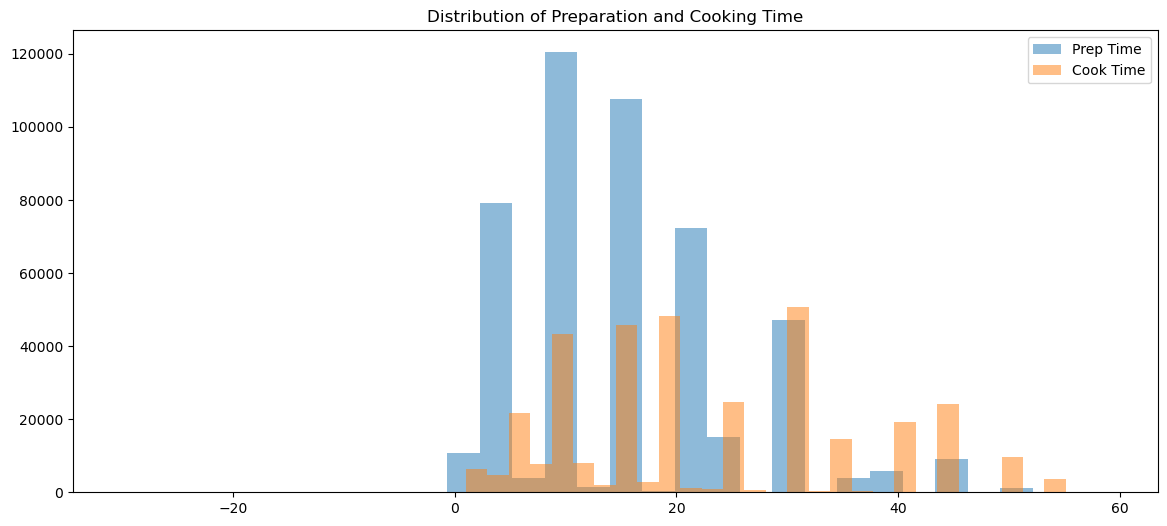

In [35]:
# 5. Preparation and Cooking Time - Histogram
data['PrepTime_minutes'] = pd.to_numeric(data['PrepTime'].str.replace('PT', '').str.replace('M', ''), errors='coerce')
data['CookTime_minutes'] = pd.to_numeric(data['CookTime'].str.replace('PT', '').str.replace('M', ''), errors='coerce')

plt.figure(figsize=(14, 6))
plt.hist(data['PrepTime_minutes'].dropna(), bins=30, alpha=0.5, label='Prep Time')
plt.hist(data['CookTime_minutes'].dropna(), bins=30, alpha=0.5, label='Cook Time')
plt.legend()
plt.title('Distribution of Preparation and Cooking Time')
plt.show()

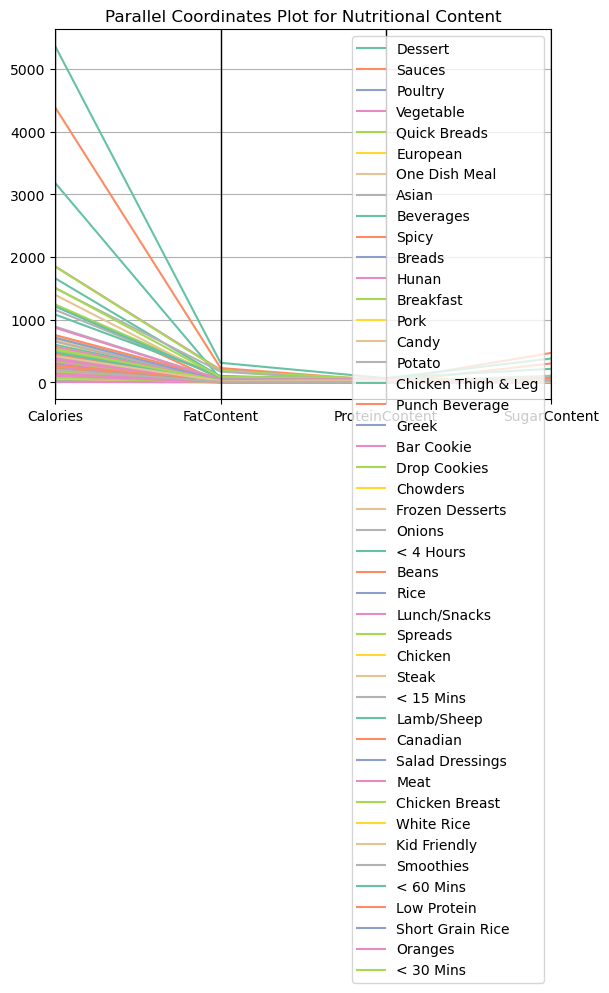

In [37]:
nutritional_columns = ['Calories', 'FatContent', 'ProteinContent', 'SugarContent']
data_sample = data.sample(100)  # Sampling for clarity in visualization
parallel_coordinates(data_sample, class_column='RecipeCategory', cols=nutritional_columns, color=plt.cm.Set2.colors)
plt.title('Parallel Coordinates Plot for Nutritional Content')
plt.show()

In [39]:
copy_data = data.copy()

In [41]:
copy_data.RecipeServings = pd.to_numeric(copy_data.RecipeServings, errors='coerce')

In [43]:
copy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522517 entries, 0 to 522516
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   RecipeId                    522517 non-null  int64  
 1   Name                        522517 non-null  object 
 2   AuthorId                    522517 non-null  int64  
 3   AuthorName                  522517 non-null  object 
 4   CookTime                    439972 non-null  object 
 5   PrepTime                    522517 non-null  object 
 6   TotalTime                   522517 non-null  object 
 7   DatePublished               522517 non-null  object 
 8   Description                 522512 non-null  object 
 9   Images                      522516 non-null  object 
 10  RecipeCategory              521766 non-null  object 
 11  Keywords                    505280 non-null  object 
 12  RecipeIngredientQuantities  522514 non-null  object 
 13  RecipeIngredie

In [45]:
copy_data.isnull().sum()

RecipeId                           0
Name                               0
AuthorId                           0
AuthorName                         0
CookTime                       82545
PrepTime                           0
TotalTime                          0
DatePublished                      0
Description                        5
Images                             1
RecipeCategory                   751
Keywords                       17237
RecipeIngredientQuantities         3
RecipeIngredientParts              0
AggregatedRating              253223
ReviewCount                   247489
Calories                           0
FatContent                         0
SaturatedFatContent                0
CholesterolContent                 0
SodiumContent                      0
CarbohydrateContent                0
FiberContent                       0
SugarContent                       0
ProteinContent                     0
RecipeServings                182911
RecipeYield                   348071
R

In [47]:
copy_data.loc[copy_data ['RecipeServings'].isnull() == True]

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,PrepTime_minutes,CookTime_minutes
8,46,A Jad - Cucumber Pickle,1533,Dancer,NaN,PT25M,PT25M,1999-08-11T19:48:00Z,Make and share this A Jad - Cucumber Pickle re...,character(0),...,0.7,1.1,0.2,0.2,0.1,NaN,1 cup,"c(""Slice the cucumber in four lengthwise, then...",25.0,NaN
9,47,Butter Pecan Cookies,1573,benluc,PT9M,PT55M,PT1H4M,1999-09-07T09:01:00Z,Make and share this Butter Pecan Cookies recip...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,15.0,4.5,0.6,1.6,0.8,NaN,84 cookies,"c(""Preheat oven to 350 degrees."", ""Cream butte...",55.0,9.0
12,50,Biscotti Di Prato,1752,Bob Ross,PT50M,PT20M,PT1H10M,1999-08-31T21:19:00Z,Make and share this Biscotti Di Prato recipe f...,"""https://img.sndimg.com/food/image/upload/w_55...",...,23.5,14.5,0.8,7.3,2.3,NaN,56 biscotti,"c(""EGG WASH 1 Egg, large 1 tsp Water In the bo...",20.0,50.0
15,53,Jimmy G's Carrot Cake,1772,Jimg2040,PT45M,PT1H5M,PT1H50M,1999-09-08T15:39:00Z,Make and share this Jimmy G's Carrot Cake reci...,character(0),...,190.0,66.2,3.4,40.9,6.6,NaN,NaN,"c(""Grease and lightly flour 2 9x1 1/2-inch rou...",NaN,45.0
23,61,Brownie Heart Cake,1555,Cindy Hartlin,PT42M,PT35M,PT1H17M,1999-09-07T14:15:00Z,Make and share this Brownie Heart Cake recipe ...,character(0),...,2157.8,509.9,29.0,392.5,71.7,NaN,1 Large cake,"c(""CAKE: Grease 5 cup heart shaped pan; dust ...",35.0,42.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522505,541372,Chiles Rellenos Casserole,2002090414,rdsxc,PT1H,PT1H,PT2H,2020-12-21T16:34:00Z,Make and share this Chiles Rellenos Casserole ...,character(0),...,1196.8,11.9,0.9,3.6,29.0,NaN,1 9 x 13 casserole,"c(""Preheat oven to 350F."", ""Butter a 2 quart c...",NaN,NaN
522506,541373,Fran's Maple Blondies,2002090414,rdsxc,PT30M,PT20M,PT50M,2020-12-21T16:36:00Z,Make and share this Fran's Maple Blondies reci...,character(0),...,375.4,78.2,2.0,59.5,7.0,NaN,1 9× 13 cake pan,"c(""Preheat oven to 350F and grease a 9x13 pan ...",20.0,30.0
522511,541378,Meg's Pumpkin Spice Bread,2001302649,Meg J.,PT45M,PT30M,PT1H15M,2020-12-22T15:26:00Z,Even people who claim they don't like pumpkin ...,"""https://img.sndimg.com/food/image/upload/w_55...",...,903.3,139.0,2.6,86.8,10.8,NaN,7-8 Mini loaves,"c(""Beat eggs, add oil, water, and pumpkin; mix...",30.0,45.0
522515,541382,Quick & Easy Asian Cucumber Salmon Rolls,2001004241,CLUBFOODY,NaN,PT15M,PT15M,2020-12-22T22:11:00Z,"Extremely quick and easy to make, these are gr...","""https://img.sndimg.com/food/image/upload/w_55...",...,100.5,0.3,0.0,0.1,2.4,NaN,20 rolls,"c(""In a small bowl, combine mayo and wasabi pa...",15.0,NaN


In [49]:
(copy_data.isnull().sum())*100/copy_data.shape[0]

RecipeId                       0.000000
Name                           0.000000
AuthorId                       0.000000
AuthorName                     0.000000
CookTime                      15.797572
PrepTime                       0.000000
TotalTime                      0.000000
DatePublished                  0.000000
Description                    0.000957
Images                         0.000191
RecipeCategory                 0.143727
Keywords                       3.298840
RecipeIngredientQuantities     0.000574
RecipeIngredientParts          0.000000
AggregatedRating              48.462155
ReviewCount                   47.364775
Calories                       0.000000
FatContent                     0.000000
SaturatedFatContent            0.000000
CholesterolContent             0.000000
SodiumContent                  0.000000
CarbohydrateContent            0.000000
FiberContent                   0.000000
SugarContent                   0.000000
ProteinContent                 0.000000


In [51]:
copy_data.dropna(how = 'any', inplace = True)

In [53]:
copy_data.isnull().sum()

RecipeId                      0
Name                          0
AuthorId                      0
AuthorName                    0
CookTime                      0
PrepTime                      0
TotalTime                     0
DatePublished                 0
Description                   0
Images                        0
RecipeCategory                0
Keywords                      0
RecipeIngredientQuantities    0
RecipeIngredientParts         0
AggregatedRating              0
ReviewCount                   0
Calories                      0
FatContent                    0
SaturatedFatContent           0
CholesterolContent            0
SodiumContent                 0
CarbohydrateContent           0
FiberContent                  0
SugarContent                  0
ProteinContent                0
RecipeServings                0
RecipeYield                   0
RecipeInstructions            0
PrepTime_minutes              0
CookTime_minutes              0
dtype: int64

In [55]:
# Group the tenure in bins of 12 months
labels = ["{0}-{1}".format(i, i + 11) for i in range(1, 72, 12)]

copy_data['Calories'] = pd.cut(data.Calories, range(1, 80, 12), right=False, labels=labels)

copy_data.drop(columns='Calories', axis=1, inplace=True)
copy_data.tail()

,RecipeId,Name,AuthorId,AuthorName,CookTime,PrepTime,TotalTime,DatePublished,Description,Images,...,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,RecipeYield,RecipeInstructions,PrepTime_minutes,CookTime_minutes
520241,538941,Belgian Fries With Andalouse Sauce,400708,Bonnie G 2,PT20M,PT20M,PT40M,2019-06-20T13:54:00Z,Belgian fries are cooked twice for a soft midd...,"c(""https://img.sndimg.com/food/image/upload/w_...",...,93.6,24.8,3.2,1.6,2.9,10.0,3 Pounds,"c(""SAUCE:"", ""Stir mayonnaise, tomato paste, re...",20.0,20.0
520255,538955,Cuban Bread,400708,Bonnie G 2,PT18M,PT25M,PT43M,2019-06-24T13:48:00Z,"I enjoy making all kinds of bread, and while s...","c(""https://img.sndimg.com/food/image/upload/w_...",...,1169.2,98.7,4.2,2.4,14.1,4.0,4 Sandwich Rolls,"c(""Grease a large bowl, and set aside."", ""Take...",25.0,18.0
520273,538973,Grilled Cuban Sandwich,400708,Bonnie G 2,PT10M,PT10M,PT20M,2019-06-26T12:05:00Z,Once I made Cuban bread needed to find an auth...,"""https://img.sndimg.com/food/image/upload/w_55...",...,1537.5,4.9,0.4,1.3,53.2,8.0,8 sandwiches,"c(""Assemble the sandwich."", ""Spread 2 tablespo...",10.0,10.0
520760,539476,Thai Basil Chicken (Gai Pad Krapow),1248549,StrawberryAnnie,PT7M,PT3M,PT10M,2019-11-07T14:45:00Z,Make and share this Thai Basil Chicken (Gai Pa...,character(0),...,935.6,9.8,0.7,4.3,22.6,4.0,4,"c(""In a wok over high heat, add the oil, chili...",3.0,7.0
522039,540899,Butter Pecan Banana Muffins,1827868,jarp4,PT18M,PT10M,PT28M,2020-09-01T20:59:00Z,Make and share this Butter Pecan Banana Muffin...,character(0),...,253.0,28.9,1.6,15.8,3.3,12.0,12 Muffins,"c(""Heat oven to 375 degrees. Coat a standard 1...",10.0,18.0


In [57]:
ana_copy_data=data.copy()     #for analysis later

In [59]:
ana_copy_data.describe()

,RecipeId,AuthorId,AggregatedRating,ReviewCount,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeServings,PrepTime_minutes,CookTime_minutes
count,522517.000000,5.225170e+05,269294.000000,275028.000000,522517.000000,522517.000000,522517.000000,522517.000000,5.225170e+05,522517.000000,522517.000000,522517.000000,522517.000000,339606.000000,478019.000000,341620.000000
mean,271821.436970,4.572585e+07,4.632014,5.227784,484.438580,24.614922,9.559457,86.487003,7.672639e+02,49.089092,3.843242,21.878254,17.469510,8.606191,15.377441,22.736842
std,155495.878422,2.929714e+08,0.641934,20.381347,1397.116649,111.485798,46.622621,301.987009,4.203621e+03,180.822062,8.603163,142.620191,40.128837,114.319809,9.381716,13.121125
min,38.000000,2.700000e+01,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,-30.000000,1.000000
25%,137206.000000,6.947400e+04,4.500000,1.000000,174.200000,5.600000,1.500000,3.800000,1.233000e+02,12.800000,0.800000,2.500000,3.500000,4.000000,10.000000,12.000000
50%,271758.000000,2.389370e+05,5.000000,2.000000,317.100000,13.800000,4.700000,42.600000,3.533000e+02,28.200000,2.200000,6.400000,9.100000,6.000000,15.000000,20.000000
75%,406145.000000,5.658280e+05,5.000000,4.000000,529.100000,27.400000,10.800000,107.900000,7.922000e+02,51.100000,4.600000,17.900000,25.000000,8.000000,20.000000,30.000000
max,541383.000000,2.002886e+09,5.000000,3063.000000,612854.600000,64368.100000,26740.600000,130456.400000,1.246921e+06,108294.600000,3012.000000,90682.300000,18396.200000,32767.000000,58.000000,59.000000


In [61]:
ana_copy_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
RecipeId,522517.0,NaN,NaN,NaN,271821.43697,155495.878422,38.0,137206.0,271758.0,406145.0,541383.0
Name,522517,438188,Banana Bread,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AuthorId,522517.0,NaN,NaN,NaN,45725847.894476,292971448.66643,27.0,69474.0,238937.0,565828.0,2002886148.0
AuthorName,522517,56793,ratherbeswimmin,7742,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CookTime,439972,490,PT30M,50715,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PrepTime,522517,318,PT10M,120265,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TotalTime,522517,1240,PT30M,41590,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DatePublished,522517,245540,1999-12-01T20:03:00Z,221,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,522512,492838,Make and share this Banana Bread recipe from F...,96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Images,522516,165889,character(0),356620,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
#separating categorical and numerical features before analysis
cat_cols=ana_copy_data.select_dtypes(include=['object']).columns
num_cols = ana_copy_data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Name', 'AuthorName', 'CookTime', 'PrepTime', 'TotalTime',
       'DatePublished', 'Description', 'Images', 'RecipeCategory', 'Keywords',
       'RecipeIngredientQuantities', 'RecipeIngredientParts', 'RecipeYield',
       'RecipeInstructions'],
      dtype='object')
Numerical Variables:
['RecipeId', 'AuthorId', 'AggregatedRating', 'ReviewCount', 'Calories', 'FatContent', 'SaturatedFatContent', 'CholesterolContent', 'SodiumContent', 'CarbohydrateContent', 'FiberContent', 'SugarContent', 'ProteinContent', 'RecipeServings', 'PrepTime_minutes', 'CookTime_minutes']


In [65]:
dataset=data.copy()
columns=['RecipeId','Name','CookTime','PrepTime','TotalTime','RecipeIngredientParts','Calories','FatContent','SaturatedFatContent','CholesterolContent','SodiumContent','CarbohydrateContent','FiberContent','SugarContent','ProteinContent','RecipeInstructions']
dataset=dataset[columns]

In [67]:
dataset.head()

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
1,39,Biryani,PT25M,PT4H,PT4H25M,"c(""saffron"", ""milk"", ""hot green chili peppers""...",1110.7,58.8,16.6,372.8,368.4,84.4,9.0,20.4,63.4,"c(""Soak saffron in warm milk for 5 minutes and..."
2,40,Best Lemonade,PT5M,PT30M,PT35M,"c(""sugar"", ""lemons, rind of"", ""lemon, zest of""...",311.1,0.2,0.0,0.0,1.8,81.5,0.4,77.2,0.3,"c(""Into a 1 quart Jar with tight fitting lid, ..."
3,41,Carina's Tofu-Vegetable Kebabs,PT20M,PT24H,PT24H20M,"c(""extra firm tofu"", ""eggplant"", ""zucchini"", ""...",536.1,24.0,3.8,0.0,1558.6,64.2,17.3,32.1,29.3,"c(""Drain the tofu, carefully squeezing out exc..."
4,42,Cabbage Soup,PT30M,PT20M,PT50M,"c(""plain tomato juice"", ""cabbage"", ""onion"", ""c...",103.6,0.4,0.1,0.0,959.3,25.1,4.8,17.7,4.3,"c(""Mix everything together and bring to a boil..."


In [69]:
max_Calories=2000
max_daily_fat=100
max_daily_Saturatedfat=13
max_daily_Cholesterol=300
max_daily_Sodium=2300
max_daily_Carbohydrate=325
max_daily_Fiber=40
max_daily_Sugar=40
max_daily_Protein=200
max_list=[max_Calories,max_daily_fat,max_daily_Saturatedfat,
          max_daily_Cholesterol,max_daily_Sodium,max_daily_Carbohydrate,
          max_daily_Fiber,max_daily_Sugar,max_daily_Protein]

In [71]:
extracted_data=dataset.copy()
for column,maximum in zip(extracted_data.columns[6:15],max_list):
    extracted_data=extracted_data[extracted_data[column]<maximum]

In [73]:
extracted_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 375703 entries, 0 to 522515
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   RecipeId               375703 non-null  int64  
 1   Name                   375703 non-null  object 
 2   CookTime               313207 non-null  object 
 3   PrepTime               375703 non-null  object 
 4   TotalTime              375703 non-null  object 
 5   RecipeIngredientParts  375703 non-null  object 
 6   Calories               375703 non-null  float64
 7   FatContent             375703 non-null  float64
 8   SaturatedFatContent    375703 non-null  float64
 9   CholesterolContent     375703 non-null  float64
 10  SodiumContent          375703 non-null  float64
 11  CarbohydrateContent    375703 non-null  float64
 12  FiberContent           375703 non-null  float64
 13  SugarContent           375703 non-null  float64
 14  ProteinContent         375703 non-null  f

In [75]:
extracted_data.iloc[:,6:15].corr()

,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent
Calories,1.000000,0.767356,0.603317,0.478934,0.501082,0.711640,0.458711,0.180895,0.689447
FatContent,0.767356,1.000000,0.767357,0.440515,0.381944,0.223549,0.192142,0.042603,0.468088
SaturatedFatContent,0.603317,0.767357,1.000000,0.512186,0.319671,0.176623,0.044003,0.090721,0.388618
CholesterolContent,0.478934,0.440515,0.512186,1.000000,0.335843,0.066104,-0.047346,-0.036112,0.675302
SodiumContent,0.501082,0.381944,0.319671,0.335843,1.000000,0.294636,0.260479,-0.055518,0.500457
CarbohydrateContent,0.711640,0.223549,0.176623,0.066104,0.294636,1.000000,0.580535,0.390120,0.255447
FiberContent,0.458711,0.192142,0.044003,-0.047346,0.260479,0.580535,1.000000,0.068758,0.273488
SugarContent,0.180895,0.042603,0.090721,-0.036112,-0.055518,0.390120,0.068758,1.000000,-0.120441
ProteinContent,0.689447,0.468088,0.388618,0.675302,0.500457,0.255447,0.273488,-0.120441,1.000000


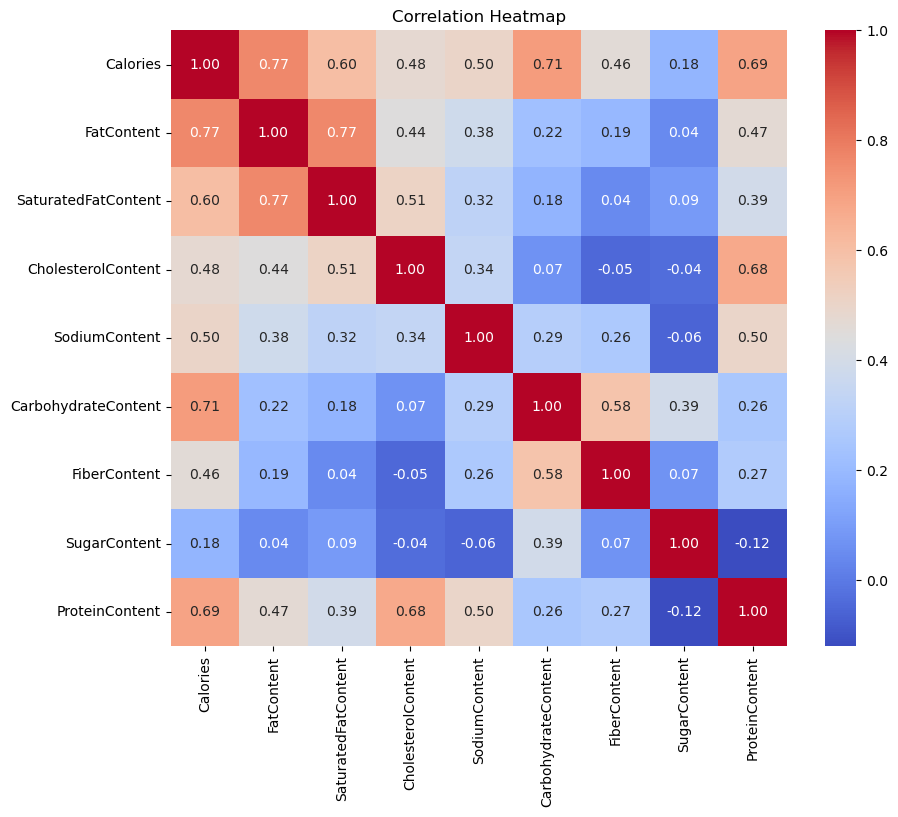

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
corr_matrix = extracted_data.iloc[:, 6:15].corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)

# Add title and display the plot
plt.title('Correlation Heatmap')
plt.show()

In [79]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
prep_data=scaler.fit_transform(extracted_data.iloc[:,6:15].to_numpy())

In [81]:
len(prep_data)

375703

In [83]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(metric='cosine',algorithm='brute')
neigh.fit(prep_data)

NearestNeighbors(algorithm='brute', metric='cosine')

In [85]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(neigh.kneighbors,kw_args={'return_distance':False})
pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])

In [87]:
print(transformer,"---",pipeline)

FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                    kw_args={'return_distance': False}) --- Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'return_distance': False}))])


In [89]:
params={'n_neighbors':10,'return_distance':False}
pipeline.get_params()
pipeline.set_params(NN__kw_args=params)

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('NN',
                 FunctionTransformer(func=<bound method KNeighborsMixin.kneighbors of NearestNeighbors(algorithm='brute', metric='cosine')>,
                                     kw_args={'n_neighbors': 10,
                                              'return_distance': False}))])

In [91]:
pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]

array([     0, 333440, 349044, 109248,  19679, 156831, 144322, 301119,
       262699, 332342], dtype=int64)

In [93]:
extracted_data.iloc[pipeline.transform(extracted_data.iloc[0:1,6:15].to_numpy())[0]]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
463750,480841,Mango Salsa,PT5M,PT10M,PT15M,"c(""fresh mango"", ""tomatoes"", ""sweet onion"", ""f...",152.5,0.8,0.2,0.0,6.6,37.9,3.8,34.0,2.2,"c(""In a medium-sized bowl, whisk together vine..."
485171,503065,Glazed Pineapple With Cinnamon Creme Fraiche,PT10M,PT10M,PT20M,"c(""lime"", ""honey"", ""ground cinnamon"", ""ground ...",172.5,2.2,1.2,5.0,19.8,41.5,3.8,32.4,1.4,"c(""Mix the lime juice and half the lime zest w..."
158110,165636,Lemon Float Punch,PT120H,PT5M,PT120H5M,"c(""lemons"", ""sugar"", ""water"", ""ginger ale"", ""l...",158.4,1.7,0.9,0.4,38.6,40.1,4.0,31.1,1.9,"c(""Combine lemon juice and sugar; stir to diss..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."
224062,233508,Blueberry Mango Smoothie,NaN,PT5M,PT5M,"c(""vanilla-flavored soymilk"", ""frozen blueberr...",147.5,0.4,0.1,0.0,2.9,39.5,4.2,34.9,0.9,"""Place all ingredients in a blender. Blend un..."
206883,215824,Blueberry Orange Smoothie,NaN,PT5M,PT5M,"c(""blueberries"", ""fresh blueberries"")",179.4,2.6,1.3,0.7,34.3,38.1,3.0,30.4,3.1,"c(""Combine first 5 ingredients in blender."", ""..."
419537,434977,Preserved Apple Pie Filling,PT30M,PT1H,PT1H30M,"c(""apples"", ""bottled lemon juice"", ""sugar"", ""g...",161.3,0.3,0.1,0.0,3.6,42.2,3.8,36.4,0.4,"c(""Set a large pot of water to boil."", ""Pour 1..."
367808,381181,Tropical Twister Smoothies,NaN,PT5M,PT5M,"c(""fresh mango"", ""papaya"", ""fresh pineapple ch...",190.8,2.6,1.4,8.0,32.4,41.3,3.6,29.6,4.0,"c(""Combine all ingredients in a blender and pr..."
462235,479288,Summer Fruit Bowl,NaN,PT1H30M,PT1H30M,"c(""blueberries"", ""granulated sugar"", ""kirsch"",...",155.4,0.2,0.0,0.0,10.2,40.6,3.8,36.2,1.7,"c(""Place fruit in a large bowl."", ""Add sugar a..."


K-NEAREST-NEIGHBOUR

Accuracy: 0.945
Precision: [0.48       0.92929293 1.        ]
Recall: [1.         0.95833333 0.        ]
F1 Score: 0.9435897435897436
ROC AUC Score: 0.9455128205128206
Confusion Matrix:
 [[97  7]
 [ 4 92]]


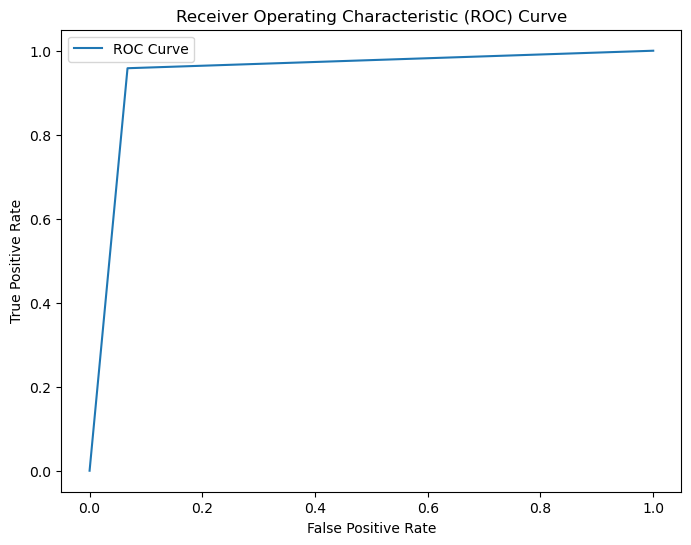

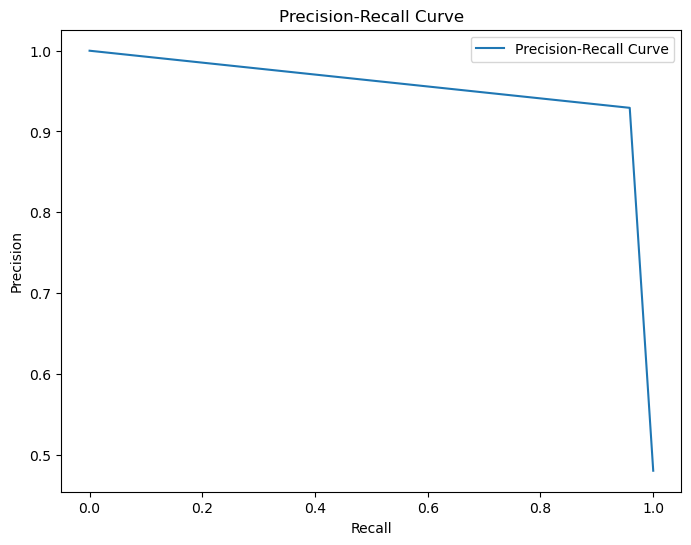

In [98]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt


X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a k-Nearest Neighbors classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

In [100]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.92
Precision: [0.48       0.89215686 1.        ]
Recall: [1.         0.94791667 0.        ]
F1 Score: 0.9191919191919192
ROC AUC Score: 0.921073717948718
Confusion Matrix:
 [[93 11]
 [ 5 91]]


DECISION TREE CLASSIFIER

In [107]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_recall_curve
import matplotlib.pyplot as plt

X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a Decision Tree classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate various metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred)

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred)


# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)
print("Confusion Matrix:\n", conf_matrix)


Accuracy: 0.835
Precision: [0.48       0.78378378 1.        ]
Recall: [1.      0.90625 0.     ]
F1 Score: 0.8405797101449275
ROC AUC Score: 0.8377403846153846
Confusion Matrix:
 [[80 24]
 [ 9 87]]


In [109]:
extracted_data[extracted_data['RecipeIngredientParts'].str.contains("beans",regex=False)]

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
19,57,Black Bean Salsa,NaN,PT10M,PT10M,"c(""black beans"", ""tomatoes"", ""roma tomatoes"", ...",114.3,3.8,0.5,0.0,3.7,15.6,5.5,1.4,5.4,"c(""Combine all ingredients in a bowl."", ""Serve..."
24,62,"Black Bean, Corn, and Tomato Salad",PT15M,PT10M,PT25M,"c(""fresh lemon juice"", ""olive oil"", ""black bea...",407.8,15.4,2.3,0.0,20.0,55.8,16.6,4.3,17.1,"c(""In a bowl whisk together lemon juice, oil, ..."
77,121,Lamb and Pork Cassoulet,PT1H,PT15M,PT1H15M,"c(""cannellini beans"", ""ketchup"", ""chili powder...",584.9,30.3,9.9,104.7,838.4,36.7,12.4,7.2,40.5,"c(""Saute onion and garlic in oil."", ""Add lamb ..."
229,287,Feijoada (Brazilian Bean Soup),PT2H13M,PT20M,PT2H33M,"c(""dried black beans"", ""onions"", ""turkey Polis...",286.9,5.8,1.8,15.7,436.8,43.2,10.0,3.1,16.6,"c(""Sort and wash beans; place in a large Dutch..."
231,289,Feijoada (Brazilian Bean Soup) II,PT2H,PT30M,PT2H30M,"c(""black beans"", ""water"", ""ham"", ""hot Italian ...",293.8,15.5,5.4,58.5,938.3,12.6,3.9,1.3,25.2,"c(""Soak black beans overnight; drain."", ""Prehe..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522386,541251,Easy Garbanzo Bean Soup,PT10M,PT5M,PT15M,"c(""olive oil"", ""onion"", ""garlic clove"", ""garba...",201.8,8.3,1.2,0.4,1220.8,26.5,5.0,1.2,6.0,"c(""Drain and rinse garbanzo beans."", ""Heat Oil..."
522422,541289,Turkey Black Bean Enchiladas,PT50M,PT10M,PT1H,"c(""chili powder"", ""ground cumin"", ""dried orega...",461.6,24.3,9.9,88.9,1583.9,25.7,8.7,2.6,37.3,"c(""In a medium bowl, whisk together the chili ..."
522477,541344,Tita Dolly's Fabada Asturiana,PT1H,PT1H,PT2H,"c(""garlic"", ""baby lima beans"", ""onion"", ""ham h...",191.2,3.9,1.3,8.2,258.1,28.7,5.6,2.2,11.0,"c(""Soak dry beans."", ""Overnight method: Soak f..."
522485,541352,Cran-Beany,PT10M,PT1M,PT11M,"c(""olive oil"", ""French style green beans"", ""dr...",199.4,17.0,1.9,0.0,331.7,11.7,5.3,2.8,3.7,"c(""1. Preheat olive oil in frying pan over low..."


Creating End To End Function

This code is designed to recommend recipes based on nutritional values and ingredient filters. It uses scaling, K-Nearest Neighbors (KNN) with cosine similarity, and a pipeline to automate the process.

In [112]:
def scaling(dataframe):
    scaler=StandardScaler()
    prep_data=scaler.fit_transform(dataframe.iloc[:,6:15].to_numpy())
    return prep_data,scaler

def nn_predictor(prep_data):
    neigh = NearestNeighbors(metric='cosine',algorithm='brute')
    neigh.fit(prep_data)
    return neigh

def build_pipeline(neigh,scaler,params):
    transformer = FunctionTransformer(neigh.kneighbors,kw_args=params)
    pipeline=Pipeline([('std_scaler',scaler),('NN',transformer)])
    return pipeline

def extract_data(dataframe,ingredient_filter,max_nutritional_values):
    extracted_data=dataframe.copy()
    for column,maximum in zip(extracted_data.columns[6:15],max_nutritional_values):
        extracted_data=extracted_data[extracted_data[column]<maximum]
    if ingredient_filter!=None:
        for ingredient in ingredient_filter:
            extracted_data=extracted_data[extracted_data['RecipeIngredientParts'].str.contains(ingredient,regex=False)]
    return extracted_data

def apply_pipeline(pipeline,_input,extracted_data):
    return extracted_data.iloc[pipeline.transform(_input)[0]]

def recommand(dataframe,_input,max_nutritional_values,ingredient_filter=None,params={'return_distance':False}):
    extracted_data=extract_data(dataframe,ingredient_filter,max_nutritional_values)
    prep_data,scaler=scaling(extracted_data)
    neigh=nn_predictor(prep_data)
    pipeline=build_pipeline(neigh,scaler,params)
    return apply_pipeline(pipeline,_input,extracted_data)


In [114]:
test_input=extracted_data.iloc[0:1,6:15].to_numpy()
recommand(dataset,test_input,max_list)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
463750,480841,Mango Salsa,PT5M,PT10M,PT15M,"c(""fresh mango"", ""tomatoes"", ""sweet onion"", ""f...",152.5,0.8,0.2,0.0,6.6,37.9,3.8,34.0,2.2,"c(""In a medium-sized bowl, whisk together vine..."
485171,503065,Glazed Pineapple With Cinnamon Creme Fraiche,PT10M,PT10M,PT20M,"c(""lime"", ""honey"", ""ground cinnamon"", ""ground ...",172.5,2.2,1.2,5.0,19.8,41.5,3.8,32.4,1.4,"c(""Mix the lime juice and half the lime zest w..."
158110,165636,Lemon Float Punch,PT120H,PT5M,PT120H5M,"c(""lemons"", ""sugar"", ""water"", ""ginger ale"", ""l...",158.4,1.7,0.9,0.4,38.6,40.1,4.0,31.1,1.9,"c(""Combine lemon juice and sugar; stir to diss..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."


In [116]:
def recommend_by_calories(dataframe, max_daily_fat, max_nutritional_values, ingredient_filter=None, params={'return_distance':False}):
    # Extract data based on maximum nutritional values and ingredient filter
    extracted_data = extract_data(dataframe, ingredient_filter, max_nutritional_values)

    # Scale the data
    prep_data, scaler = scaling(extracted_data)

    # Fit the Nearest Neighbors model
    neigh = nn_predictor(prep_data)

    # Build the pipeline
    pipeline = build_pipeline(neigh, scaler, params)

    # Create a test input with specified calories
    test_input = np.array([[0] * 9])  # Assuming the input shape is (1, 9) for 9 nutritional features
    test_input[0, 1] = max_daily_fat  # Set the calories

 # Get recipe recommendation based on test input
    recommended_recipe = apply_pipeline(pipeline, test_input, extracted_data)

    return recommended_recipe

# Example usage
recommended_recipe = recommend_by_calories(dataset, 100, max_list)
recommended_recipe.drop(columns=["RecipeId","CookTime","PrepTime","TotalTime"],inplace=True)

In [118]:
recommended_recipe.head()

,Name,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
87063,Marinated Broccoli,"c(""fresh broccoli"", ""canola oil"", ""white vineg...",400.7,41.2,3.0,0.0,320.9,7.5,2.4,2.7,1.8,"c(""Wash and drain the broccoli, then cut the f..."
33325,Mint & Pistachio Pesto,"c(""fresh mint leaves"", ""canola oil"", ""garlic"",...",424.9,44.5,3.4,0.0,75.1,6.6,2.3,1.9,2.7,"c(""in a blender or food processor, combine oil..."
79431,Strawberry Poppy Seed Salad,"c(""canola oil"", ""cider"", ""water"", ""honey"", ""po...",372.9,37.2,2.8,0.0,197.1,11.2,2.1,8.0,1.2,"c(""In a blender or food processor, mix first e..."
372444,Creamy &quot;ricotta&quot; Dip,"c(""pine nuts"", ""lemon juice"", ""water"", ""scalli...",460.9,46.2,3.3,0.0,293.6,10.8,2.8,3.0,9.5,"c(""1. Rinse pine nuts in cold water; then disc..."
361630,Radicchio Salad With Walnut Dressing,"c(""white wine"", ""coarse salt"", ""fresh ground p...",375.4,38.4,3.6,0.0,146.5,5.5,2.6,1.1,5.8,"c(""Whisk together vinegar, salt and pepper in ..."


In [120]:
test_input=extracted_data.iloc[0:1,6:15].to_numpy()
recommand(dataset,test_input,max_list)

,RecipeId,Name,CookTime,PrepTime,TotalTime,RecipeIngredientParts,Calories,FatContent,SaturatedFatContent,CholesterolContent,SodiumContent,CarbohydrateContent,FiberContent,SugarContent,ProteinContent,RecipeInstructions
0,38,Low-Fat Berry Blue Frozen Dessert,PT24H,PT45M,PT24H45M,"c(""blueberries"", ""granulated sugar"", ""vanilla ...",170.9,2.5,1.3,8.0,29.8,37.1,3.6,30.2,3.2,"c(""Toss 2 cups berries with sugar."", ""Let stan..."
463750,480841,Mango Salsa,PT5M,PT10M,PT15M,"c(""fresh mango"", ""tomatoes"", ""sweet onion"", ""f...",152.5,0.8,0.2,0.0,6.6,37.9,3.8,34.0,2.2,"c(""In a medium-sized bowl, whisk together vine..."
485171,503065,Glazed Pineapple With Cinnamon Creme Fraiche,PT10M,PT10M,PT20M,"c(""lime"", ""honey"", ""ground cinnamon"", ""ground ...",172.5,2.2,1.2,5.0,19.8,41.5,3.8,32.4,1.4,"c(""Mix the lime juice and half the lime zest w..."
158110,165636,Lemon Float Punch,PT120H,PT5M,PT120H5M,"c(""lemons"", ""sugar"", ""water"", ""ginger ale"", ""l...",158.4,1.7,0.9,0.4,38.6,40.1,4.0,31.1,1.9,"c(""Combine lemon juice and sugar; stir to diss..."
28595,32172,L & B's Concoction,PT5M,PT5M,PT10M,"c(""strawberry"", ""strawberry"", ""milk"", ""blueber...",167.3,2.0,1.0,5.7,26.2,38.4,3.0,29.9,3.1,"c(""Blend the frozen strawberries, ice cubes, y..."


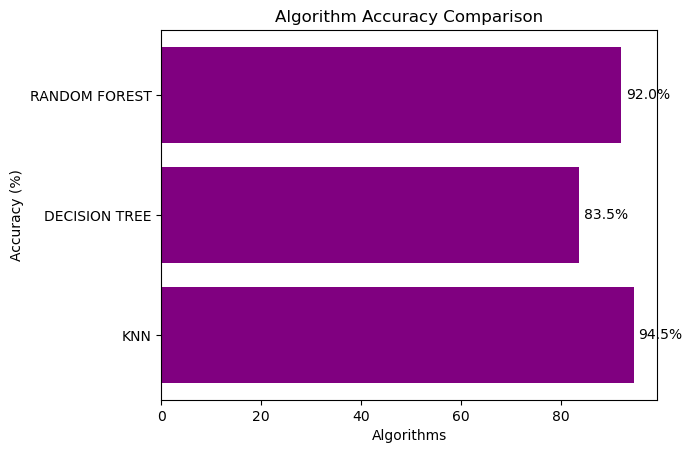

In [124]:
import matplotlib.pyplot as plt

# Algorithm names
algorithms = ['KNN', 'DECISION TREE','RANDOM FOREST']

# Corresponding accuracy values
accuracy = [94.50,83.50,92.00]

# Create a bar graph
plt.barh(algorithms, accuracy, color='purple')

# Add labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy (%)')
plt.title('Algorithm Accuracy Comparison')
for i in range(len(algorithms)):
    plt.text(accuracy[i] + 1, i, f'{accuracy[i]}%', ha='left', va='center')


# Show the plot
plt.show()
